In [1]:
# Set up the package development environment (e.g. after restarting kernel)
# pwd() should be "C:\\GitWorking\\Autologistic"
using Pkg  
Pkg.activate(pwd())   #At cmd line, could use ]activate .
using Revise
using Autologistic

┌ Info: Recompiling stale cache file C:\Users\krams\.julia\compiled\v0.7\Autologistic\Gemat.ji for Autologistic [05505b62-b0bd-11e8-1cec-1f3e16cbc293]
└ @ Base loading.jl:1185


In [2]:
#-- make an ALmodel object using the full construtor --

# make response, unary part
y = Array{Bool,2}(round.(rand(10,1)))
u1 = FullUnary(rand(10))
u2 = LinPredUnary(rand(10,3), [1, 2, 4])

# make pairwise part
using LightGraphs
G = Graph(10,20)
p = SimplePairwise(G)

# Call the constructor ALmodel(Y,unary,pairwise,centering,coding,labels)
M1 = ALmodel(y, u1, p, none, (-1,1), ("low","high"))
M2 = ALmodel(y, u2, p, none, (-1,1), ("low","high"))
display(M1)
display(M2)

ALmodel{FullUnary,SimplePairwise,CenteringKinds}(Bool[true; false; … ; false; false], Real[0.095267, 0.296117, 0.0381716, 0.530815, 0.92392, 0.320396, 0.580307, 0.738542, 0.231239, 0.759638], Real[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], none::CenteringKinds = 0, (-1, 1), ("low", "high"))

ALmodel{LinPredUnary,SimplePairwise,CenteringKinds}(Bool[true; false; … ; false; false], Real[2.48134, 3.69769, 3.85875, 5.25829, 5.72149, 2.87891, 2.84467, 1.8702, 5.03052, 4.39002], Real[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], none::CenteringKinds = 0, (-1, 1), ("low", "high"))

In [3]:
# Make an ALmodel using outer constructors
M3 = ALmodel(FullUnary(10),SimplePairwise(Graph(10,20)),centering=onehalf)

ALmodel{FullUnary,SimplePairwise,CenteringKinds}(Bool[false; false; … ; false; false], Real[1.37997e-315, 1.30662e-315, 2.96439e-323, 1.37997e-315, 1.37997e-315, 1.37997e-315, 2.07508e-322, 1.63042e-322, 7.41098e-323, 1.37458e-315], Real[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], onehalf::CenteringKinds = 2, (-1, 1), ("low", "high"))

In [4]:
# Make an ALRsimple model with the custom constructor
X = rand(20,3)
GG = Graph(20,30)
M4 = ALRsimple(GG,X,coding=(0,1),λ=2.0, β=rand(3), Y=round.(rand(20)))

ALmodel{LinPredUnary,SimplePairwise,CenteringKinds}(Bool[false; false; … ; false; true], Real[1.09922, 0.559461, 1.56892, 0.923789, 0.688818, 1.46521, 0.690087, 1.09583, 1.02767, 1.28561, 1.44003, 1.02763, 1.2346, 0.927266, 1.35317, 1.05858, 0.411019, 0.921471, 0.828999, 1.11972], Real[0.0 0.0 … 0.0 2.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 2.0 0.0 … 0.0 0.0], none::CenteringKinds = 0, (0, 1), ("low", "high"))

In [18]:
display(getparameters(M4.unary))
display(getparameters(M4))

3-element Array{Float64,1}:
 0.4633121272204521 
 0.43954429749390744
 0.5124517531695654 

4-element Array{Float64,1}:
 0.4633121272204521 
 0.43954429749390744
 0.5124517531695654 
 2.0                

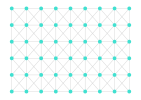

In [19]:
# Demonstrate graph8()
r = 6
c = 9
gg = grid8(r,c)
using GraphPlot
gplot(gg[1], [gg[2][i][1] for i in 1:r*c], [gg[2][i][2] for i in 1:r*c])

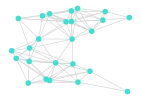

In [20]:
# Demonstrate spatialgraph() using random pts on unit square
nvert = 25
cutoff = 0.35
coords = [(rand(),rand()) for i in 1:nvert]
ggg = spatialgraph(coords, cutoff)
gplot(ggg[1], [ggg[2][i][1] for i in 1:nvert], [ggg[2][i][2] for i in 1:nvert])

In [21]:
# Try loading hydrocotyle data and making a graph.
using DataFrames, CSV
hydro = CSV.read("C:\\MWProf\\Data Sets\\ALRdata\\Hydrocotyle\\hydrocotyle.csv")
hydrocoords = [(hydro.X[i], hydro.Y[i]) for i in 1:size(hydro)[1]]
gr = spatialgraph(hydrocoords, sqrt(2))

({2995, 11528} undirected simple Int64 graph, Tuple{Int64,Int64}[(16, 1), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (15, 3), (16, 3), (17, 3), (18, 3)  …  (34, 77), (43, 77), (44, 77), (26, 78), (27, 78), (28, 78), (31, 78), (32, 78), (33, 78), (27, 79)])

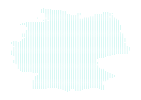

In [22]:
gplot(gr[1], [Float64(gr[2][i][1]) for i in 1:size(hydro)[1]], 
      [Float64(gr[2][i][2]) for i in 1:size(hydro)[1]],
      edgestrokec="black")


In [8]:
setparameters!(M4, [1.1,2.2,3.3,1.67]);
pars1 = getparameters(M4)
setunaryparameters!(M4, [4.4, 5.5, 6.6]);
pars2 = getparameters(M4)
setpairwiseparameters!(M4, [88.0]);
pars3 = getparameters(M4)
display([pars1 pars2 pars3])

4×3 Array{Float64,2}:
 1.1   4.4    4.4
 2.2   5.5    5.5
 3.3   6.6    6.6
 1.67  1.67  88.0